## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
#데이터 로드
df_22 = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv',encoding='euc_kr')
df_21 = pd.read_csv('./data/자동차리콜현황(2021).csv', encoding='euc_kr')
df_20 = pd.read_csv('./data/자동차리콜현황(2020) v3.0.csv', encoding='euc_kr')

In [139]:
df_22[df_22['제작자']=='한신특장']

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1281,한신특장,한신특장 울트라 고소작업차,2013-04-24,2013-09-30,2022-12-01,인증 중량 초과


In [9]:
# 데이터 병합
df = pd.concat([df_22, df_21, df_20])

In [23]:
# 데이터 중복 여부 및 개수 확인

df_22[df_22.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
303,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
304,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
392,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
393,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
527,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
528,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1217,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [142]:
print("Before:", len(df_22))
df_22 = df_22.drop_duplicates()
print("After:", len(df_22))

Before: 1414
After: 1414


In [141]:
df_22[df_22['제작자']=='한신특장']

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1281,한신특장,한신특장 울트라 고소작업차,2013-04-24,2013-09-30,2022-12-01,인증 중량 초과


In [143]:
print("Before:", len(df_21))
df_21 = df_21.drop_duplicates()
print("After:", len(df_21))

Before: 1962
After: 1959


In [26]:
df_20[df_20.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...


In [144]:
print("Before:", len(df_20))
df_20 = df_20.drop_duplicates()
print("After:", len(df_20))

Before: 1275
After: 1274


In [145]:
df_22[df_22['제작자']=='한신특장']

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1281,한신특장,한신특장 울트라 고소작업차,2013-04-24,2013-09-30,2022-12-01,인증 중량 초과


## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [28]:
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1414 non-null   object
 1   차명        1414 non-null   object
 2   생산기간(부터)  1414 non-null   object
 3   생산기간(까지)  1414 non-null   object
 4   리콜개시일     1414 non-null   object
 5   리콜사유      1414 non-null   object
dtypes: object(6)
memory usage: 77.3+ KB


In [29]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1959 entries, 0 to 1961
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1959 non-null   object
 1   차명        1959 non-null   object
 2   생산기간(부터)  1959 non-null   object
 3   생산기간(까지)  1959 non-null   object
 4   리콜개시일     1959 non-null   object
 5   리콜사유      1959 non-null   object
dtypes: object(6)
memory usage: 107.1+ KB


In [63]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1274 non-null   object
 1   차명        1274 non-null   object
 2   생산기간(부터)  1274 non-null   object
 3   생산기간(까지)  1274 non-null   object
 4   리콜개시일     1274 non-null   object
 5   리콜사유      1274 non-null   object
dtypes: object(6)
memory usage: 69.7+ KB


In [147]:
df_2221 = pd.concat([df_22, df_21])

In [148]:
df_2221[df_2221['제작자']=='한신특장']

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1281,한신특장,한신특장 울트라 고소작업차,2013-04-24,2013-09-30,2022-12-01,인증 중량 초과


In [149]:
df = pd.concat([df_2221, df_20])

In [150]:
df[df['제작자']=='한신특장']

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1281,한신특장,한신특장 울트라 고소작업차,2013-04-24,2013-09-30,2022-12-01,인증 중량 초과


In [79]:
df.head(10)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,비엠더블유코리아(주),X4 xDrive20d xLine,2018-06-15,2019-03-22,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1,비엠더블유코리아(주),X3 xDrive20d M Sport Package,2017-09-04,2019-03-23,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
2,비엠더블유코리아(주),520d xDrive,2016-05-23,2018-06-14,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
3,비엠더블유코리아(주),520d xDrive,2015-11-10,2015-11-10,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
4,비엠더블유코리아(주),520d xDrive,2014-06-13,2016-10-27,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
5,비엠더블유코리아(주),520d,2016-09-13,2018-06-14,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
6,비엠더블유코리아(주),520d,2016-02-01,2016-02-01,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
7,비엠더블유코리아(주),520d,2014-06-10,2016-10-25,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
8,비엠더블유코리아(주),420d xDrive Gran Coupe,2017-04-06,2020-08-28,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
9,비엠더블유코리아(주),420d xDrive Gran Coupe,2015-03-25,2017-02-24,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성


In [151]:
df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])
df['리콜_년'] = df['리콜개시일'].dt.year
df['리콜_월'] = df['리콜개시일'].dt.month
df['리콜_일'] = df['리콜개시일'].dt.day

In [82]:
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,리콜_년,리콜_월,리콜_일
0,비엠더블유코리아(주),X4 xDrive20d xLine,2018-06-15,2019-03-22,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16
1,비엠더블유코리아(주),X3 xDrive20d M Sport Package,2017-09-04,2019-03-23,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16
2,비엠더블유코리아(주),520d xDrive,2016-05-23,2018-06-14,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16
3,비엠더블유코리아(주),520d xDrive,2015-11-10,2015-11-10,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16
4,비엠더블유코리아(주),520d xDrive,2014-06-13,2016-10-27,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16


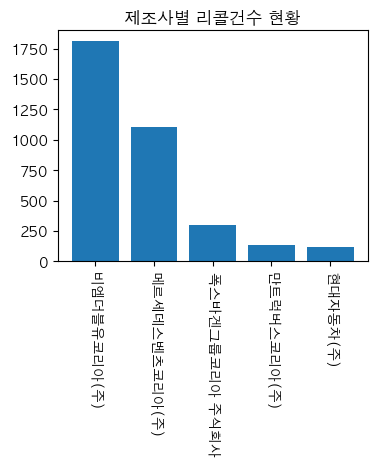

In [152]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count').head(5)

x = tmp.index
y = tmp['count']

plt.figure(figsize=(4,3))   
plt.bar(x=x,height=y)      

plt.xticks(rotation=270)  
plt.title('제조사별 리콜건수 현황')  
plt.show()


```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [108]:
df.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,리콜_년,리콜_월,리콜_일
0,비엠더블유코리아(주),X4 xDrive20d xLine,2018-06-15,2019-03-22,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16
1,비엠더블유코리아(주),X3 xDrive20d M Sport Package,2017-09-04,2019-03-23,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16
2,비엠더블유코리아(주),520d xDrive,2016-05-23,2018-06-14,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16


In [153]:
df['생산기간(까지)'] = pd.to_datetime(df['생산기간(까지)'])
df['출고_년'] = df['생산기간(까지)'].dt.year
df['출고_월'] = df['생산기간(까지)'].dt.month
df['출고_일'] = df['생산기간(까지)'].dt.day

In [110]:
df.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,리콜_년,리콜_월,리콜_일,출고_년,출고_월,출고_일
0,비엠더블유코리아(주),X4 xDrive20d xLine,2018-06-15,2019-03-22,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16,2019,3,22
1,비엠더블유코리아(주),X3 xDrive20d M Sport Package,2017-09-04,2019-03-23,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16,2019,3,23
2,비엠더블유코리아(주),520d xDrive,2016-05-23,2018-06-14,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2022,2,16,2018,6,14


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4647 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   제작자       4647 non-null   object        
 1   차명        4647 non-null   object        
 2   생산기간(부터)  4647 non-null   object        
 3   생산기간(까지)  4647 non-null   datetime64[ns]
 4   리콜개시일     4647 non-null   datetime64[ns]
 5   리콜사유      4647 non-null   object        
 6   리콜_년      4647 non-null   int32         
 7   리콜_월      4647 non-null   int32         
 8   리콜_일      4647 non-null   int32         
 9   출고_년      4647 non-null   int32         
 10  출고_월      4647 non-null   int32         
 11  출고_일      4647 non-null   int32         
dtypes: datetime64[ns](2), int32(6), object(4)
memory usage: 363.0+ KB


In [155]:
df.drop(columns = ['생산기간(까지)', '리콜개시일'], inplace=True )

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4647 entries, 0 to 1274
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4647 non-null   object
 1   차명        4647 non-null   object
 2   생산기간(부터)  4647 non-null   object
 3   리콜사유      4647 non-null   object
 4   리콜_년      4647 non-null   int32 
 5   리콜_월      4647 non-null   int32 
 6   리콜_일      4647 non-null   int32 
 7   출고_년      4647 non-null   int32 
 8   출고_월      4647 non-null   int32 
 9   출고_일      4647 non-null   int32 
dtypes: int32(6), object(4)
memory usage: 290.4+ KB


In [157]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
# 사용기간 : '리콜_년' - '출고_년'
df['사용기간'] = df['리콜_년'] - df['출고_년']


In [158]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
df.sort_values(by='사용기간', ascending=False, inplace=True)

In [159]:
df.head(5)

,제작자,차명,생산기간(부터),리콜사유,리콜_년,리콜_월,리콜_일,출고_년,출고_월,출고_일,사용기간
1016,폭스바겐그룹코리아 주식회사,A6 2.4,1997-06-04,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",2021,8,3,1997,11,6,24
1020,폭스바겐그룹코리아 주식회사,A8 2.8 quat.,1997-08-19,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",2021,8,3,1997,9,9,24
1017,폭스바겐그룹코리아 주식회사,A4 1.8,1997-08-26,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",2021,8,3,1998,10,9,23
843,비엠더블유코리아(주),318i,1998-11-13,리콜 과정에서 에어백 교체 차량에서 회수한 에어백 인플레이터*를 해당 에어백의 제조...,2021,6,25,1999,6,22,22
831,비엠더블유코리아(주),320Ci,1999-08-02,리콜 과정에서 에어백 교체 차량에서 회수한 에어백 인플레이터*를 해당 에어백의 제조...,2021,6,25,2000,4,27,21


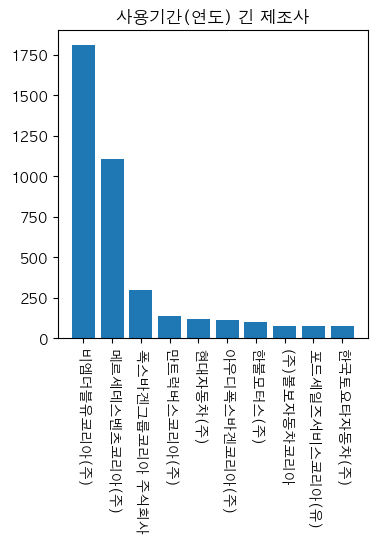

In [171]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('사용기간').head(10)

# print(tmp)

x = tmp.index
y = tmp['사용기간']

plt.figure(figsize=(4, 4))   
plt.bar(x=x,height=y)    
plt.title('사용기간(연도) 긴 제조사')    

plt.xticks(rotation=270)  
plt.show()

Text(0.5, 1.0, '사용기간(연도) 짧은 제조사')

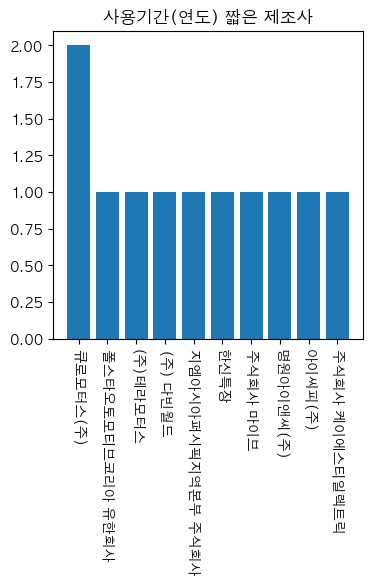

In [175]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('사용기간').tail(10)

x = tmp.index
y = tmp['사용기간']

plt.figure(figsize=(4, 4))   
plt.bar(x=x,height=y) 
plt.xticks(rotation=270) 
plt.title('사용기간(연도) 짧은 제조사')   


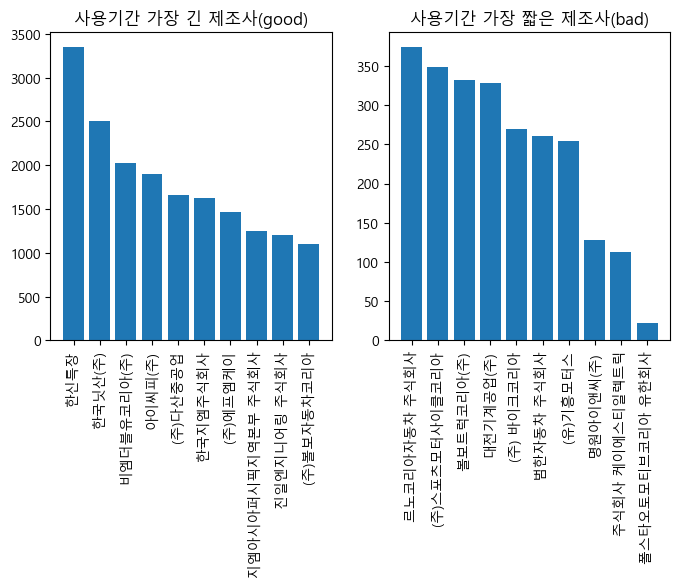

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐




```
문제:그나마 튼튼 제조사 top 3는?
답: 비엠더블유코리아(주), 메르세데스벤츠코리아(주), 폭스바겐그룹코리아 주식회사
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [177]:
df.head()

,제작자,차명,생산기간(부터),리콜사유,리콜_년,리콜_월,리콜_일,출고_년,출고_월,출고_일,사용기간
1016,폭스바겐그룹코리아 주식회사,A6 2.4,1997-06-04,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",2021,8,3,1997,11,6,24
1020,폭스바겐그룹코리아 주식회사,A8 2.8 quat.,1997-08-19,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",2021,8,3,1997,9,9,24
1017,폭스바겐그룹코리아 주식회사,A4 1.8,1997-08-26,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",2021,8,3,1998,10,9,23
843,비엠더블유코리아(주),318i,1998-11-13,리콜 과정에서 에어백 교체 차량에서 회수한 에어백 인플레이터*를 해당 에어백의 제조...,2021,6,25,1999,6,22,22
831,비엠더블유코리아(주),320Ci,1999-08-02,리콜 과정에서 에어백 교체 차량에서 회수한 에어백 인플레이터*를 해당 에어백의 제조...,2021,6,25,2000,4,27,21


In [181]:
# 리콜건수가 가장 많은 제조사는? 비엠더블유코리아(주)
df['제작자'].value_counts().head(1)

제작자
비엠더블유코리아(주)    1809
Name: count, dtype: int64

In [184]:
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
print(f'리콜건수가 가장 많은 제조사는? {tmp.index[0]}')

리콜건수가 가장 많은 제조사는? 비엠더블유코리아(주)


In [185]:
# 리콜 사유는?
df_bmw = df[df['제작자']=='비엠더블유코리아(주)']
df_bmw['리콜사유'].values

array(['리콜 과정에서 에어백 교체 차량에서 회수한 에어백 인플레이터*를 해당 에어백의 제조사인 Joyson Safety Systems(JSS)에서 추가 분석한 결과 에어백의 밀봉 불량 가능성이 발견되었습니다.',
       '리콜 과정에서 에어백 교체 차량에서 회수한 에어백 인플레이터*를 해당 에어백의 제조사인 Joyson Safety Systems(JSS)에서 추가 분석한 결과 에어백의 밀봉 불량 가능성이 발견되었습니다.',
       '차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다.',
       ...,
       '운전석 차문 내부에서 차문 외부 손잡이와 차문 잠금 장치 사이에 장착되어야 하는 어댑터 브라켓이 장착되지 않았을 가능성이 있습니다 *어댑터 브라켓: 차문 외부 손잡이의 열쇠 실린더와 도어 잠금 장치 사이에 연결되어 차량의 잠금을 조작할 수 있는 연결봉(커넥팅 로드)의 덮개로서, 외부로부터의 차문 잠금 상태의 수동 조작을 방지합니다. 또한 측면 충격 등에 의해 장치들의 위치 변경이 발생 경우, 차문 외부 손잡이와 도어 잠금 장치 사이를 고정하여 구조적 위치를 유지시켜 주는 구성품',
       'BMW 자체 품질조사결과 2021년 02월 09일에 생산 된 BMW X5 xDrive 45e 차량에서 뒷좌석 창가 쪽 양쪽 머리받침대의 제작결함이 발견 되었습니다.',
       '배터리 셀 생산 공정 중에 손상된 음극판 조각이 배터리 셀 내부에 유입되어 고전압 배터리에 단락이 발생할 수 있습니다.'],
      dtype=object)

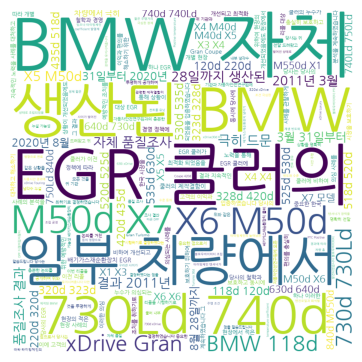

In [83]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

caselist = result['리콜사유'].values
text = ' '.join(caselist)
len(text)


font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()


In [186]:
text = ''.join(df_bmw['리콜사유'].values)

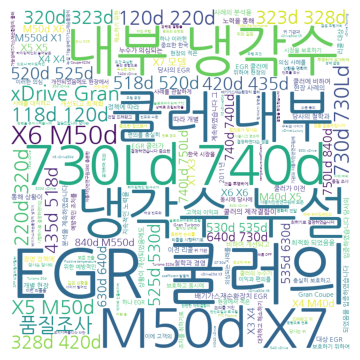

In [199]:
from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['2020년', '31일부터', '28일까지', '8월', '3월', '극히', '드문', '일부', '결과', '생산된', 'BMW', '자체', '에서', '차량에서', '되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)

wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()

In [248]:
df_bmw['리콜사유'].drop_duplicates().values

array(['리콜 과정에서 에어백 교체 차량에서 회수한 에어백 인플레이터*를 해당 에어백의 제조사인 Joyson Safety Systems(JSS)에서 추가 분석한 결과 에어백의 밀봉 불량 가능성이 발견되었습니다.',
       '차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다.',
       'BMW 3시리즈 모델 중 일부 차량에서 운전자석 TAKATA 에어백에 제작결함이 발견 되었 습니다. 사고가 발생한 차량을 해당 에어백의 제조사인 Joyson Safety System(JSS)*에서 조사한 결과, 1999년 4월 이전에 제작된 NADI 인플레이터 (가스 제너레이터) 일부에서 밀봉 불량의 가능성이 확인 되었습니다.',
       '블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive temperature coefficient) 발열체*와 구리관 사이가 벌어진 상태로 조립되었을 가능성이 발견되었습니다.',
       '플라스틱 구조의 연료펌프 플라스틱 케이스 테두리가 노후화 되어 내구성의 부족으로 균열이 발생 할 가능성이 있습니다.',
       '원동기 출력',
       'BMW 자체 품질 조사 결과 2007년 11월 13일부터 2015년 5월 29일까지 생산된 BMW 520d 등 56개모델의 일부 차량에서 타이밍체인①과 관련한 제작결함이 발견 되었습니다. 사용시간 경과에 따라 타이밍체인의 늘어남은 발생할 수 있으나 타이밍체인 텐셔너가 장력을 유지시켜줍니다. 다만, 주행 조건(극심한 정체, 짧은 주행거리 등)에 따른 DPF(디젤미립자필터)의 재생 빈도와 수준 등의 영향으로 연료(경유)가 엔진오일과 희석될 수 있습니다.',
       '타이밍체인①의 사용시간 경과에 따라 타이밍체인의 늘어남은 발생할 수 있으나 타이밍체인 텐셔너가 장력을 유지시켜줍니다. 다만, 주행 조건(극심한 정체, 짧은 주행거리 등

In [254]:
df_bmw[df_bmw['리콜사유'].str.contains('EGR 쿨러의')].head()

,제작자,차명,생산기간(부터),리콜사유,리콜_년,리콜_월,리콜_일,출고_년,출고_월,출고_일,사용기간
668,비엠더블유코리아(주),MINI Cooper SD Coupe,2012-06-19,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2020,10,1,2012,11,29,8
512,비엠더블유코리아(주),BMW 520d Touring,2012-03-29,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2020,6,1,2012,10,2,8
522,비엠더블유코리아(주),BMW 525d,2012-07-04,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2020,6,1,2012,10,17,8
536,비엠더블유코리아(주),BMW 535d,2011-09-05,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2020,6,1,2012,8,27,8
667,비엠더블유코리아(주),MINI Cooper SD Coupe,2012-07-06,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2020,6,1,2012,9,4,8


In [258]:
# 주요 원인이 포함된 이유 상세 보기
df_bmw_recall = df_bmw[df_bmw['리콜사유'].str.contains('EGR 쿨러의')]
df_bmw_recall['리콜사유'].drop_duplicates().values

array(['당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 되었음을 입증하였습니다. 당사의 철학과 경영 정책에 따라, 개별 현장 사례의 분석을 계속하였습니다. 그 결과, 지속적인 노력을 통해 상황이 개선되었음에도, 현장에서 적은 수이기는 하나 EGR 쿨러의 누수가 의심되는 사례를 관찰하게 되었습니다. 이에 고객의 이익과 편의를 충실히 보호하고, 동시에 당사에 매우 중요한 한국 시장을 보호하기 위하여, 현장의 적은 수이기는 하나 이러한 의심 사례를 대처하고 해소하기 위한 예방적인 조치를 취하기로 결정하였습니다. 중요한 점으로서, 당사는 귀 기관과 자동차안전연구원에 모든 것을 투명하게 공개하며, 위와 같은 상황을 명확히 전달 드려왔고, 귀 기관 및 자동차안전연구원과의 충분한 논의를 거친 후, 이번 리콜을 시행하기로 결정하였다는 점을 말씀드립니다.'],
      dtype=object)

In [259]:
df_bmw_recall['차명'].drop_duplicates().values

array(['MINI Cooper SD Coupe', 'BMW 520d Touring', 'BMW 525d', 'BMW 535d',
       'BMW X1 xDrive25d', 'MINI Cooper SD Paceman ALL4',
       'MINI Cooper SD Paceman', 'BMW 328d', 'MINI Cooper D',
       'BMW Gran Turismo 20d', 'MINI Cooper D Paceman',
       'MINI Cooper D Paceman ALL4', 'BMW X3 xDrive35d',
       'BMW Gran Turismo 30d', 'BMW Gran Turismo 30d xDrive',
       'MINI Cooper SD', 'MINI Cooper SD Clubman', 'BMW 740d',
       'BMW 525d xDrive', 'BMW 520d', 'BMW 730d',
       'BMW 525d xDrive Touring', 'BMW 420d xDrive Coupe',
       'BMW 420d xDrive Gran Coupe', 'BMW 520d xDrive', 'BMW 730Ld',
       'BMW 535d xDrive', 'MINI Cooper SD Countryman',
       'MINI Cooper D Clubman', 'BMW X6 M50d', 'BMW X5 xDrive35d',
       'BMW X3 xDrive30d', 'BMW X3 xDrive20d', 'BMW 328d xDrive',
       'BMW 325d', 'BMW 120d', 'BMW 220d Coupe', 'BMW 420d Coupe',
       'BMW 750Ld xDrive', 'BMW 740d xDrive', 'BMW 730d xDrive',
       'BMW X4 xDrive30d', 'BMW M550d xDrive', 'BMW 320d Touring',
  

In [279]:
# 주요 원인으로 리콜된 가장 나쁜 모델3개는?

tmp = df_bmw_recall.groupby('차명').size().sort_values(ascending=False).to_frame('count').head(10)
print(tmp)

                              count
차명                                 
BMW 520d                          8
BMW 320d Gran Turismo             6
BMW 420d Gran Coupe               6
BMW 320d xDrive Gran Turismo      6
BMW 520d xDrive                   6
BMW X3 xDrive20d                  6
BMW 420d xDrive Gran Coupe        5
BMW X6 M50d                       4
MINI Cooper D                     4
BMW 730d xDrive                   4


In [277]:
tmp = df_bmw_recall.groupby('차명').size().sort_values(ascending=False).to_frame('count')
print(f'주요 원인으로 리콜된 가장 나쁜 모델3개는? {tmp.index[0], tmp.index[1], tmp.index[2]}')

주요 원인으로 리콜된 가장 나쁜 모델3개는? ('BMW 520d', 'BMW 320d Gran Turismo', 'BMW 420d Gran Coupe')


```
리콜 주요 원인은? EGR 쿨러의 누수가 의심

그래서, 가장 나쁜 모델은?  'BMW 520d'
```

당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 되었음을 입증하였습니다. 당사의 철학과 경영 정책에 따라, 개별 현장 사례의 분석을 계속하였습니다. 그 결과, 지속적인 노력을 통해 상황이 개선되었음에도, 현장에서 적은 수이기는 하나 'EGR 쿨러의 누수가 의심'되는 사례를 관찰하게 되었습니다. 이에 고객의 이익과 편의를 충실히 보호하고, 동시에 당사에 매우 중요한 한국 시장을 보호하기 위하여, 현장의 적은 수이기는 하나 이러한 의심 사례를 대처하고 해소하기 위한 예방적인 조치를 취하기로 결정하였습니다. 중요한 점으로서, 당사는 귀 기관과 자동차안전연구원에 모든 것을 투명하게 공개하며, 위와 같은 상황을 명확히 전달 드려왔고, 귀 기관 및 자동차안전연구원과의 충분한 논의를 거친 후, 이번 리콜을 시행하기로 결정하였다는 점을 말씀드립니다.